In [1]:
'''
!pip install prophet
!pip install plotly
'''

'\n!pip install prophet\n!pip install plotly\n'

In [2]:
# Importando as bibliotecas
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

/home/geovanne/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('train.csv', low_memory=False)

In [4]:
# Variável que receberá o input da seleção da loja do usuário
i = 1

In [5]:
# Selecionando os dados apenas de uma loja
df = df.loc[df.Store == i]

In [6]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [7]:
df['Date']

0         2015-07-31
1115      2015-07-30
2230      2015-07-29
3345      2015-07-28
4460      2015-07-27
             ...    
1011635   2013-01-05
1012750   2013-01-04
1013865   2013-01-03
1014980   2013-01-02
1016095   2013-01-01
Name: Date, Length: 942, dtype: datetime64[ns]

In [8]:
# Criando o DataFrame Holiday

# Public Holiday
public_holiday=df[df['StateHoliday']=='a']

public = pd.DataFrame({
  'holiday': 'public',
  'ds': public_holiday['Date'],
  'lower_window': 0,
  'upper_window': 0,
})

# Easter Holiday
easter_holiday=df[df['StateHoliday']=='b']

easter = pd.DataFrame({
  'holiday': 'easter',
  'ds': easter_holiday['Date'],
  'lower_window': 0,
  'upper_window': 0,
})

# Christmas Holiday
christmas_holiday=df[df['StateHoliday']=='c']

christmas = pd.DataFrame({
  'holiday': 'christmas',
  'ds': christmas_holiday['Date'],
  'lower_window': -1,
  'upper_window': 0,
})

# School Holiday
school_holiday=df[df['SchoolHoliday']==1]

school = pd.DataFrame({
  'holiday': 'school',
  'ds': school_holiday['Date'],
  'lower_window': 0,
  'upper_window': 0,
})

holidays=pd.concat((public, easter, christmas, school))

In [9]:
# Ajustando os parâmetros nos moldes do prophet
df_prophet = df.reset_index() \
    .rename(columns={'Date':'ds',
                     'Sales':'y'})

# Treinando o modelo com os dados de treino
model = Prophet(holidays=holidays, weekly_seasonality=True)
model.fit(df_prophet)

16:04:22 - cmdstanpy - INFO - Chain [1] start processing
16:04:23 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods=90)
future = future.tail(90)
future

,ds
942,2015-08-01
943,2015-08-02
944,2015-08-03
945,2015-08-04
946,2015-08-05
...,...
1027,2015-10-25
1028,2015-10-26
1029,2015-10-27
1030,2015-10-28


In [11]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(30)

,ds,yhat,yhat_lower,yhat_upper
0,2015-08-01,4412.656667,3458.012097,5425.428973
1,2015-08-02,-562.333002,-1536.946142,492.248696
2,2015-08-03,4556.618596,3531.792771,5592.993782
3,2015-08-04,4051.865484,3078.775554,5042.556033
4,2015-08-05,3916.470478,2966.996155,4941.737226
5,2015-08-06,3807.033000,2822.933704,4731.860837
6,2015-08-07,4025.534115,3010.451036,5018.549234
7,2015-08-08,4231.416678,3239.113572,5218.513335
8,2015-08-09,-722.345000,-1645.422774,288.904443
9,2015-08-10,4420.711411,3390.702703,5454.068998


/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


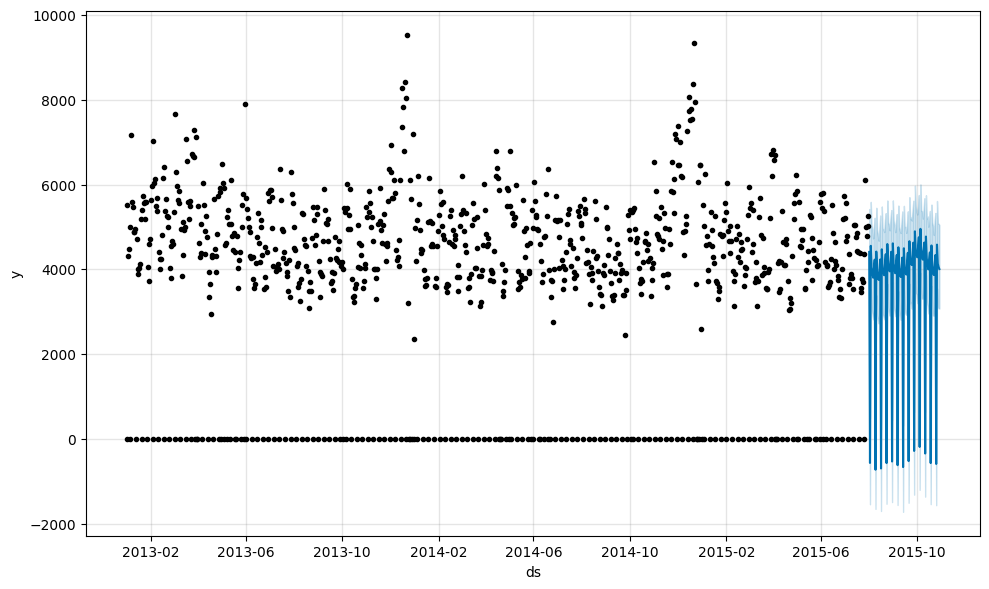

In [12]:
# Plotando a predição
fig1 = model.plot(forecast)

In [13]:
help(Prophet.plot)

Help on function plot in module prophet.forecaster:

plot(self, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y', figsize=(10, 6), include_legend=False)
    Plot the Prophet forecast.
    
    Parameters
    ----------
    fcst: pd.DataFrame output of self.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    figsize: Optional tuple width, height in inches.
    include_legend: Optional boolean to add legend to the plot.
    
    Returns
    -------
    A matplotlib figure.



/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


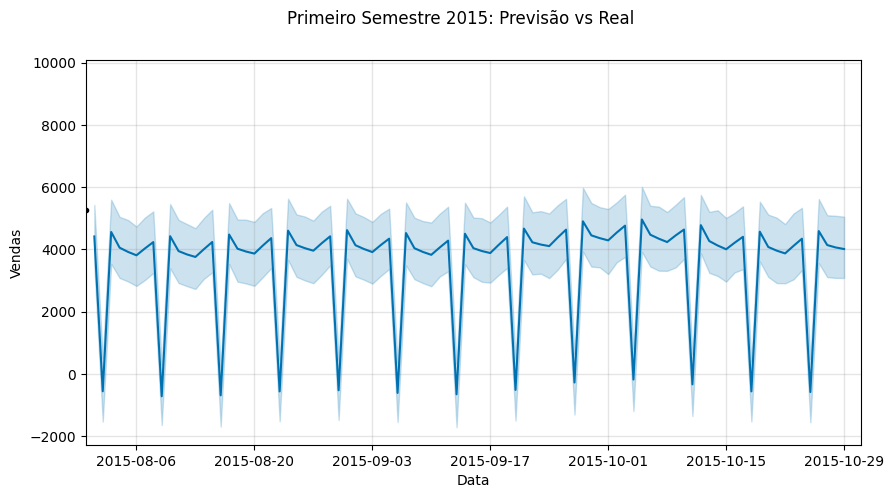

In [14]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

fig, ax = plt.subplots(figsize=(10, 5))
model.plot(forecast,uncertainty=True, ax=ax)
ax.set_xbound(lower=pd.Timestamp('2015-07-31'), 
              upper=pd.Timestamp('2015-10-31'))
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
plot = plt.suptitle('Primeiro Semestre 2015: Previsão vs Real')
plt.show()

/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/tmp/ipykernel_46064/1979342482.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


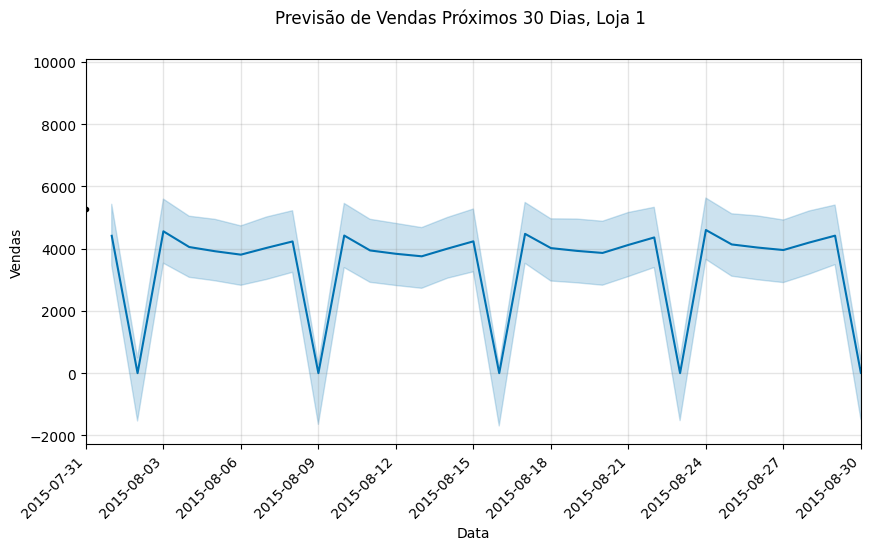

In [19]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

fig, ax = plt.subplots(figsize=(10, 5))
model.plot(forecast,uncertainty=True,  ax=ax)
ax.set_xbound(lower=pd.Timestamp('2015-07-31'), 
              upper=pd.Timestamp('2015-08-30'))
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plot = plt.suptitle(f'Previsão de Vendas Próximos 30 Dias, Loja {i}')
plt.show()

In [16]:
# Substituindo os valores negativos por zero
forecast['yhat'] = forecast['yhat'].clip(lower=0)

total = forecast['yhat'].sum()

mean = forecast['yhat'].mean()

forecast_sorted = forecast.sort_values(by='yhat')
max_day, max_sale = forecast_sorted[['ds', 'yhat']].iloc[-1]

print(f'Total de Vendas: {total:.0f}')
print(f'Média de Vendas: {mean:.2f}')
print(f'Dia de Maior Venda:', max_day.date(), f', Vendas: {max_sale:.0f}')

Total de Vendas: 325950
Média de Vendas: 3621.66
Dia de Maior Venda: 2015-10-05 , Vendas: 4957
